# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

c:\Users\jomors\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.1322 - loss: 2.2982 - val_accuracy: 0.2869 - val_loss: 2.2459
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.2319 - loss: 2.2407 - val_accuracy: 0.3952 - val_loss: 2.1701
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.3187 - loss: 2.1677 - val_accuracy: 0.5167 - val_loss: 2.0721
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.4009 - loss: 2.0733 - val_accuracy: 0.5995 - val_loss: 1.9433
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.4679 - loss: 1.9509 - val_accuracy: 0.6690 - val_loss: 1.7789
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5250 - loss: 1.8042 - val_accuracy: 0.7096 - val_loss: 1.5872
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5669 - loss: 1.6407 - val_accuracy: 0.7446 - val_loss: 1.3910
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6029 - loss: 1.4788 - 

The above provides the Loss and Accuracy for the _clean_ data. We need to store this and start introducing _noise_.

In [6]:
# Create empty arrays to store loss and accuracy scores
loss = []
accuracy = []
labels = []

# Add the scores for hte clean data to the arrays
loss.append(score[0])
accuracy.append(score[1])
labels.append('Clean')



#### 1. Add random noise to each image

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Copy the training data to use to insert noise
x_train_noisy = x_train.copy()

# Noise is added here
# The max value of the noise should not grossly surpass 1.0

for i in range(len(x_train_noisy)):
    rvals = np.random.normal(0, 0.1, x_train_noisy[i].shape)
    x_train_noisy[i] = x_train_noisy[i] + rvals

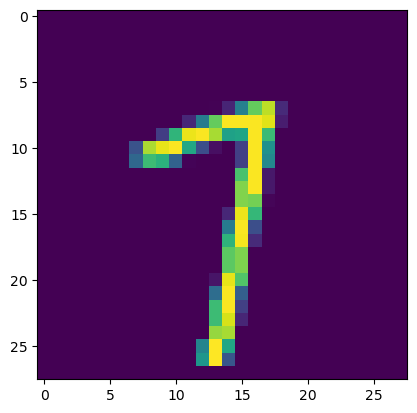

In [25]:
# Display an original image
plt.imshow(x_train[42].reshape(28,28))

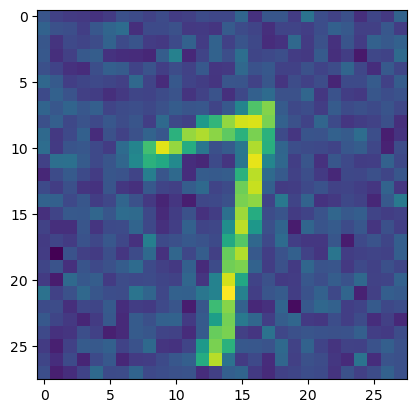

In [26]:
# Display a noisy image
plt.imshow(x_train_noisy[42].reshape(28,28))

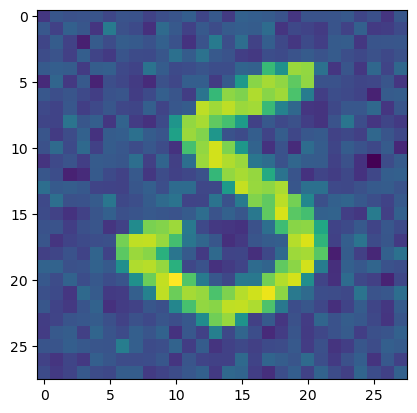

In [27]:
# Display a noisy image
plt.imshow(x_train_noisy[138].reshape(28,28))

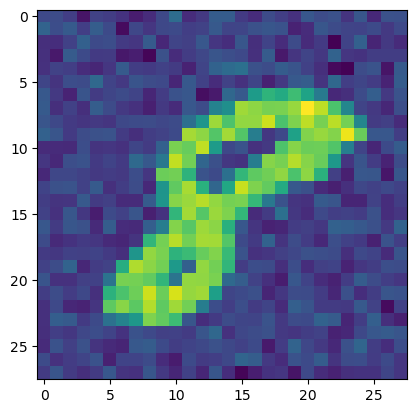

In [29]:
# Display a noisy image
plt.imshow(x_train_noisy[913].reshape(28,28))

#### 2. Run the model against the noisy data and compare loss and accuracy.

In [30]:
model.fit(x_train_noisy, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.6961 - loss: 1.0102 - val_accuracy: 0.8323 - val_loss: 0.7128
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.7115 - loss: 0.9529 - val_accuracy: 0.8403 - val_loss: 0.6656
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.7285 - loss: 0.8952 - val_accuracy: 0.8488 - val_loss: 0.6260
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.7376 - loss: 0.8653 - val_accuracy: 0.8552 - val_loss: 0.5918
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.7456 - loss: 0.8318 - val_accuracy: 0.8603 - val_loss: 0.5626
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.7550 - loss: 0.7989 - val_accuracy: 0.8644 - val_loss: 0.5372
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.7637 - loss: 0.7692 - val_accuracy: 0.8684 - val_loss: 0.5151
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.7720 - loss: 0.7465 - 

In [31]:
# Append the loss and accuracy to the arrays
loss.append(score[0])
accuracy.append(score[1])
labels.append('Noise: 0.1')

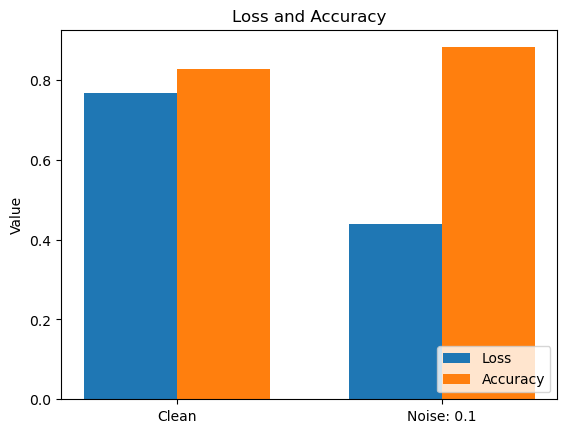

In [37]:
# Define the x-axis values
x = np.arange(len(labels))

# Define the width of each bar
width = 0.35

# Create the figure and axes
fig, ax = plt.subplots()
# Plot the loss bars
ax.bar(x - width/2, loss, width, label='Loss')
# Plot the accuracy bars
ax.bar(x + width/2, accuracy, width, label='Accuracy')
# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(labels)
# Set the y-axis label
ax.set_ylabel('Value')
# Set the chart title
ax.set_title('Loss and Accuracy')
# Add a legend
ax.legend(loc='lower right')
# Show the chart
plt.show()


Based on the results above, we actually have reduced loss and increased accuracy with the noisy data. Presumably this is due to possible overfitting introduced with the clean data.

#### 3. Vary the amount of noise.

Next we loop through the remaining scale values for introducing noise, then run models agianst each.

In [39]:
# Vary the scale of the randomization to create noisy data
noise_scale = [.5, 1.0, 2.0, 4.0]


# Loop through the noise scale values
for i in noise_scale:
    # Copy the training data to use to insert noise
    x_train_noisy = x_train.copy()

    # Noise is added here

    for j in range(len(x_train_noisy)):
        rvals = np.random.normal(0, i, x_train_noisy[j].shape)
        x_train_noisy[j] = x_train_noisy[j] + rvals

    # Fit the noisy data
    model.fit(x_train_noisy, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test)) 
    score = model.evaluate(x_test, y_test, verbose=0)

    # Append the loss and accuracy to the arrays
    loss.append(score[0])
    accuracy.append(score[1])
    labels.append('Noise: ' + str(i))


Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.7193 - loss: 0.8694 - val_accuracy: 0.8679 - val_loss: 0.4682
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7355 - loss: 0.8266 - val_accuracy: 0.8695 - val_loss: 0.4641
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.7419 - loss: 0.8123 - val_accuracy: 0.8715 - val_loss: 0.4575
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.7472 - loss: 0.7926 - val_accuracy: 0.8742 - val_loss: 0.4486
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.7491 - loss: 0.7857 - val_accuracy: 0.8757 - val_loss: 0.4423
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7499 - loss: 0.7801 - val_accuracy: 0.8767 - val_loss: 0.4361
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7566 - loss: 0.7598 - val_accuracy: 0.8777 - val_loss: 0.4318
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.7612 - loss: 0.7467 - 

#### 4. Compariosn of results

First, compare the different levels of loss and accuracy for this model.

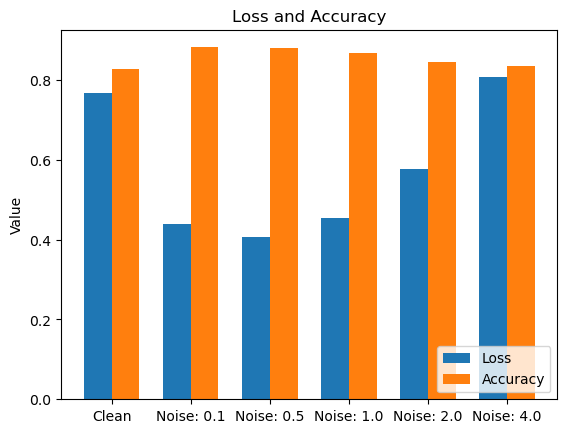

In [40]:
# Define the x-axis values
x = np.arange(len(labels))

# Define the width of each bar
width = 0.35

# Create the figure and axes
fig, ax = plt.subplots()
# Plot the loss bars
ax.bar(x - width/2, loss, width, label='Loss')
# Plot the accuracy bars
ax.bar(x + width/2, accuracy, width, label='Accuracy')
# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(labels)
# Set the y-axis label
ax.set_ylabel('Value')
# Set the chart title
ax.set_title('Loss and Accuracy')
# Add a legend
ax.legend(loc='lower right')
# Show the chart
plt.show()


Based on the chart, our best rate of loss, ~0.4, comes at a noise level of 0.5 (standard deviation for the random noise values). Accuracy, however, peaks when the noise level is at 0.1, though the accuracy is still very high at 0.5. We can view the actual values in the following table. There we can see accuracy tops out at 0.88.

In [43]:
import pandas as pd

results = {
    "Loss": [loss[0], loss[1], loss[2], loss[3], loss[4], loss[5]],
    "Accuracy": [accuracy[0], accuracy[1], accuracy[2], accuracy[3], accuracy[4], accuracy[5]]
}
pd.DataFrame(results, index = labels)

,Loss,Accuracy
Clean,0.767454,0.8291
Noise: 0.1,0.438994,0.8823
Noise: 0.5,0.406979,0.8814
Noise: 1.0,0.453325,0.8686
Noise: 2.0,0.577897,0.8465
Noise: 4.0,0.807890,0.8342


For the previous exercise, 0.88 was the lowest accuracy score we received, while the highest, again with a noise level of 0.1 standard devaition, was 0.98, indicating a much better result. Based on that outcome, I would tend to build the network without convolution for this particualr set of data.